In [ ]:
#| default_exp initializers

# Initializers

> For that moment when built in initializers don't satisfy your needs.

In [ ]:
#| export
from jax import random
from jax._src import dtypes

I found it weird that the `flax` library didn't provide a "bounded" uniform initializer, so I took the code for the `uniform` one and modified it in a way that it allowed setting the bounds of the desired uniform initialization.

In [ ]:
#| export
def bounded_uniform(minval=0.0,
                    maxval=1.0,
                    dtype=dtypes.float_,
                    ):
  def init(key,
           shape,
           dtype=dtype):
    dtype = dtypes.canonicalize_dtype(dtype)
    return random.uniform(key, shape, dtype, minval, maxval)
  return init

In [ ]:
#| hide
#| eval: false
from jax import numpy as jnp
from flax import linen as nn
import matplotlib.pyplot as plt

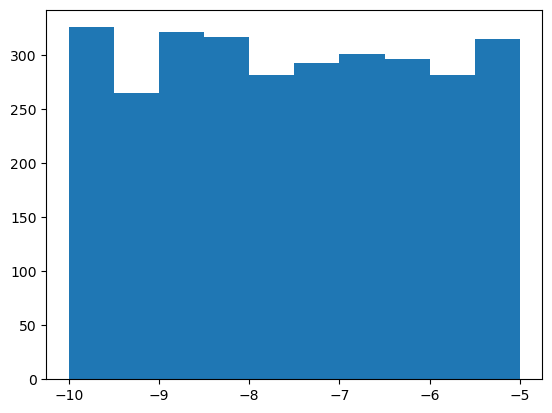

In [ ]:
#| eval: false
layer = nn.Dense(features=1000, kernel_init=bounded_uniform(minval=-10., maxval=-5.))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,32,32,3)))
plt.hist(params["params"]["kernel"].ravel())
plt.show()

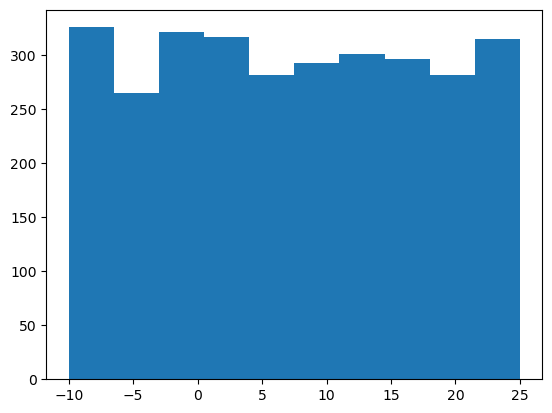

In [ ]:
#| eval: false
layer = nn.Dense(features=1000, kernel_init=bounded_uniform(minval=-10., maxval=25.))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,32,32,3)))
plt.hist(params["params"]["kernel"].ravel())
plt.show()